# Artifical Intelligence Project of Machine Learning 
## Name Kerima Nurhussien 
### ID Number:UGR/14178/14

 # Title: Rainfall Prediction 

Definition: This project aims to develop a machine learning model that can accurately predict rainfall amounts based on historical climate data.

2. Problem definition Problem type: Regression Problem statement: Predicting the amount of rainfall in a given area based on historical climate data.

3. Data Data:

Sourcing: Collecting historical climate data from government websites, weather APIs, or research institutions.
Defining different parameters: Temperature, humidity, wind speed, atmospheric pressure, etc.
Talking to experts: Consulting with meteorologists or climate scientists to understand the relationships between climate variables and rainfall.

4. Evaluation Evaluation metric: Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE)

5. Features Features:
 Temperature,
Humidity,
Wind speed,
Atmospheric pressure,
Date and time,
Location (latitude and longitude)

6. Preparing the tools Importing necessary libraries:

In [505]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [506]:
# Loading the dataset
df = pd.read_csv('falln.csv')

In [507]:
df

,year,month,day,tempavg,DPavg,humidity avg,SLPavg,visibilityavg,windavg,Rainfall
0,2011,2,13,21,13,60,1009,3,5,0.00
1,2011,2,14,21,18,75,1009,3,5,0.00
2,2011,2,15,22,18,75,1010,3,10,0.00
3,2011,2,16,23,21,86,1011,3,8,0.00
4,2011,2,17,23,19,75,1011,3,8,0.00
...,...,...,...,...,...,...,...,...,...,...
394,2012,8,12,26,24,92,1003,3,11,3.05
395,2012,8,13,27,25,91,1002,5,6,13.97
396,2012,8,14,28,26,89,1002,5,10,1.02
397,2012,8,15,28,26,86,1002,5,8,1.02


In [508]:
df.tail()

,year,month,day,tempavg,DPavg,humidity avg,SLPavg,visibilityavg,windavg,Rainfall
394,2012,8,12,26,24,92,1003,3,11,3.05
395,2012,8,13,27,25,91,1002,5,6,13.97
396,2012,8,14,28,26,89,1002,5,10,1.02
397,2012,8,15,28,26,86,1002,5,8,1.02
398,2012,8,16,29,26,82,1000,5,8,0.00


# Data exploration

##### What question(s) are you trying to solve? Predicting rainfall amount based on climate variables. 
What kind of data do you have and how do you treat different types? Numerical and datetime data 
What is missing from the data and how do you deal with it? Handling missing values using mean or median imputatio .
How can you compare different columns to each other, compare them to the target variable, and correlation between independent variables? Using correlation matrices and scatter ps.s.
How can you add, change, or remove features to get more out of your data? Feature engineering techniques such as polynomial transformations or feature select
ion.

In [509]:
df.head()

,year,month,day,tempavg,DPavg,humidity avg,SLPavg,visibilityavg,windavg,Rainfall
0,2011,2,13,21,13,60,1009,3,5,0.0
1,2011,2,14,21,18,75,1009,3,5,0.0
2,2011,2,15,22,18,75,1010,3,10,0.0
3,2011,2,16,23,21,86,1011,3,8,0.0
4,2011,2,17,23,19,75,1011,3,8,0.0


In [510]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           399 non-null    int64  
 1   month          399 non-null    int64  
 2   day            399 non-null    int64  
 3   tempavg        399 non-null    int64  
 4   DPavg          399 non-null    int64  
 5   humidity avg   399 non-null    int64  
 6   SLPavg         399 non-null    int64  
 7   visibilityavg  399 non-null    int64  
 8   windavg        399 non-null    int64  
 9   Rainfall       399 non-null    float64
dtypes: float64(1), int64(9)
memory usage: 31.3 KB


In [511]:
df.describe()

,year,month,day,tempavg,DPavg,humidity avg,SLPavg,visibilityavg,windavg,Rainfall
count,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000
mean,2011.571429,4.791980,15.566416,26.177945,21.538847,75.225564,1005.927318,4.408521,8.706767,1.999599
std,0.495493,2.567547,8.676774,3.156061,4.897735,12.012734,5.001229,1.089478,4.375782,8.532682
min,2011.000000,1.000000,1.000000,13.000000,7.000000,37.000000,994.000000,1.000000,2.000000,0.000000
25%,2011.000000,3.000000,8.000000,24.000000,18.000000,71.500000,1002.000000,4.000000,5.000000,0.000000
50%,2012.000000,5.000000,15.000000,27.000000,24.000000,78.000000,1006.000000,5.000000,8.000000,0.000000
75%,2012.000000,6.000000,23.000000,28.000000,25.000000,83.000000,1010.000000,5.000000,11.000000,0.000000
max,2012.000000,12.000000,31.000000,31.000000,28.000000,98.000000,1016.000000,6.000000,24.000000,80.010000


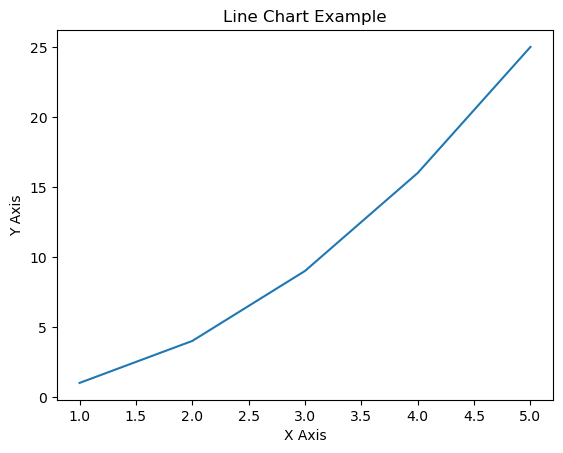

In [512]:
import matplotlib.pyplot as plt

x = [1, 2, 3, 4, 5]
y = [1, 4, 9, 16, 25]

plt.plot(x, y)
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Line Chart Example')
plt.show()


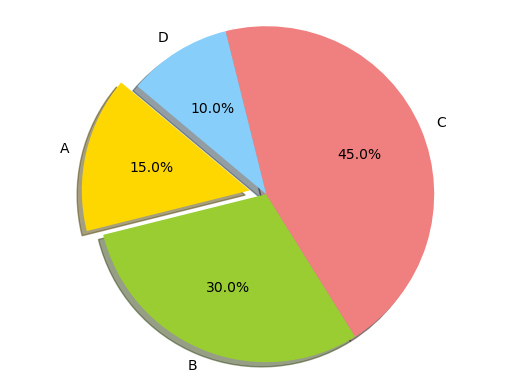

In [513]:
labels = ['A', 'B', 'C', 'D']
sizes = [15, 30, 45, 10]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0, 0)  # explode 1st slice

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

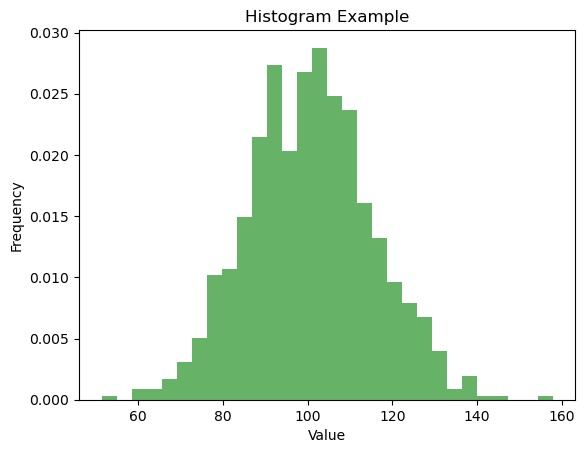

In [514]:
import matplotlib.pyplot as plt
import numpy as np

mu, sigma = 100, 15
data = np.random.normal(mu, sigma, 1000)

plt.hist(data, bins=30, density=True, alpha=0.6, color='g')

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram Example')
plt.show()

## Modelling

 #### Features and labels: Climate variables as features, rainfall amount as label.
#### Training and test split: Splitting the dataset into training (80%) and testing (20%) sets.
#### Model choices: Linear Regression, Decision Trees, Random Forest.
#### Model comparison: Comparing the performance of different models using MAE and RMSE.
#### Hyperparameter tuning and cross-validation: Tuning hyperparameters using GridSearchCV and cross-validation.

In [515]:
x = df.drop("Rainfall", axis = 1)
y =df["Rainfall"]
print(y.head())
x.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Rainfall, dtype: float64


,year,month,day,tempavg,DPavg,humidity avg,SLPavg,visibilityavg,windavg
0,2011,2,13,21,13,60,1009,3,5
1,2011,2,14,21,18,75,1009,3,5
2,2011,2,15,22,18,75,1010,3,10
3,2011,2,16,23,21,86,1011,3,8
4,2011,2,17,23,19,75,1011,3,8


In [516]:
from sklearn.model_selection import train_test_split

In [517]:
#by default we give 80% for train and 20% for testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

In [518]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((299, 9), (100, 9), (299,), (100,))

In [519]:
from sklearn.ensemble import RandomForestClassifier

In [520]:
np.random.seed(42)

In [521]:
clf = RandomForestClassifier()

In [522]:
from sklearn.ensemble import RandomForestRegressor

clf = RandomForestRegressor(n_estimators=100, random_state=70)
clf.fit(x_train, y_train)

RandomForestRegressor(random_state=70)

In [523]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           399 non-null    int64  
 1   month          399 non-null    int64  
 2   day            399 non-null    int64  
 3   tempavg        399 non-null    int64  
 4   DPavg          399 non-null    int64  
 5   humidity avg   399 non-null    int64  
 6   SLPavg         399 non-null    int64  
 7   visibilityavg  399 non-null    int64  
 8   windavg        399 non-null    int64  
 9   Rainfall       399 non-null    float64
dtypes: float64(1), int64(9)
memory usage: 31.3 KB


In [524]:
clf.fit(x_train, y_train)

RandomForestRegressor(random_state=70)

In [525]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           399 non-null    int64  
 1   month          399 non-null    int64  
 2   day            399 non-null    int64  
 3   tempavg        399 non-null    int64  
 4   DPavg          399 non-null    int64  
 5   humidity avg   399 non-null    int64  
 6   SLPavg         399 non-null    int64  
 7   visibilityavg  399 non-null    int64  
 8   windavg        399 non-null    int64  
 9   Rainfall       399 non-null    float64
dtypes: float64(1), int64(9)
memory usage: 31.3 KB


In [526]:
test = np.array([1, 1, 1, 2, 3, 0, 1, 1, 1, 1, ])


In [527]:
x_test.head()

,year,month,day,tempavg,DPavg,humidity avg,SLPavg,visibilityavg,windavg
394,2012,8,12,26,24,92,1003,3,11
310,2012,5,20,30,24,71,1004,5,6
100,2011,5,26,28,25,81,1004,5,5
238,2012,3,9,27,22,77,1006,5,6
251,2012,3,22,28,24,78,1008,5,10


In [528]:
y_pred = clf.predict(x_test)

In [529]:
y_pred

array([ 8.6434,  0.6934,  0.5333,  0.    ,  0.3228,  0.3124,  2.9409,
       18.988 ,  0.    ,  1.001 ,  9.6045,  0.    ,  2.0899,  0.    ,
        2.1257,  3.0861,  0.597 ,  5.2961,  0.    ,  0.0408,  0.6324,
        0.0306,  0.    ,  0.    ,  6.3572,  0.    ,  0.2108, 11.3408,
        0.0305,  0.5637,  0.    ,  0.1194,  0.    ,  0.    ,  0.    ,
        0.3914,  0.4902,  0.    ,  0.5412,  0.    ,  0.5995,  0.    ,
        0.406 ,  0.    ,  0.371 ,  2.197 ,  0.2385,  0.    ,  1.0058,
        0.2388,  0.8235,  0.    ,  0.    ,  1.2191,  0.    ,  2.761 ,
        0.    ,  2.7002,  7.239 ,  1.8566,  1.3896,  0.325 ,  4.3758,
        4.2017,  0.0305,  5.0631,  0.6401,  0.    ,  0.    ,  2.7208,
        1.438 ,  9.1851,  4.8137,  0.    ,  0.    ,  0.0712,  0.    ,
        1.1762,  0.7639,  0.2388,  0.    ,  2.1722,  0.    ,  0.1702,
        0.    ,  0.404 ,  1.2039,  0.    ,  2.5552, 14.4129,  1.613 ,
        5.7255,  2.1617,  1.5084,  0.    ,  0.    ,  1.7426,  0.    ,
        6.1552,  1.3

In [530]:
print(x_test.head())
y_pred

     year  month  day  tempavg  DPavg  humidity avg  SLPavg  visibilityavg  \
394  2012      8   12       26     24            92    1003              3   
310  2012      5   20       30     24            71    1004              5   
100  2011      5   26       28     25            81    1004              5   
238  2012      3    9       27     22            77    1006              5   
251  2012      3   22       28     24            78    1008              5   

     windavg  
394       11  
310        6  
100        5  
238        6  
251       10  


array([ 8.6434,  0.6934,  0.5333,  0.    ,  0.3228,  0.3124,  2.9409,
       18.988 ,  0.    ,  1.001 ,  9.6045,  0.    ,  2.0899,  0.    ,
        2.1257,  3.0861,  0.597 ,  5.2961,  0.    ,  0.0408,  0.6324,
        0.0306,  0.    ,  0.    ,  6.3572,  0.    ,  0.2108, 11.3408,
        0.0305,  0.5637,  0.    ,  0.1194,  0.    ,  0.    ,  0.    ,
        0.3914,  0.4902,  0.    ,  0.5412,  0.    ,  0.5995,  0.    ,
        0.406 ,  0.    ,  0.371 ,  2.197 ,  0.2385,  0.    ,  1.0058,
        0.2388,  0.8235,  0.    ,  0.    ,  1.2191,  0.    ,  2.761 ,
        0.    ,  2.7002,  7.239 ,  1.8566,  1.3896,  0.325 ,  4.3758,
        4.2017,  0.0305,  5.0631,  0.6401,  0.    ,  0.    ,  2.7208,
        1.438 ,  9.1851,  4.8137,  0.    ,  0.    ,  0.0712,  0.    ,
        1.1762,  0.7639,  0.2388,  0.    ,  2.1722,  0.    ,  0.1702,
        0.    ,  0.404 ,  1.2039,  0.    ,  2.5552, 14.4129,  1.613 ,
        5.7255,  2.1617,  1.5084,  0.    ,  0.    ,  1.7426,  0.    ,
        6.1552,  1.3

In [531]:
print(y_test)
print(y_pred)

394    3.05
310    0.00
100    0.00
238    0.00
251    0.00
       ... 
56     0.00
234    0.00
188    0.00
272    0.00
254    0.00
Name: Rainfall, Length: 100, dtype: float64
[ 8.6434  0.6934  0.5333  0.      0.3228  0.3124  2.9409 18.988   0.
  1.001   9.6045  0.      2.0899  0.      2.1257  3.0861  0.597   5.2961
  0.      0.0408  0.6324  0.0306  0.      0.      6.3572  0.      0.2108
 11.3408  0.0305  0.5637  0.      0.1194  0.      0.      0.      0.3914
  0.4902  0.      0.5412  0.      0.5995  0.      0.406   0.      0.371
  2.197   0.2385  0.      1.0058  0.2388  0.8235  0.      0.      1.2191
  0.      2.761   0.      2.7002  7.239   1.8566  1.3896  0.325   4.3758
  4.2017  0.0305  5.0631  0.6401  0.      0.      2.7208  1.438   9.1851
  4.8137  0.      0.      0.0712  0.      1.1762  0.7639  0.2388  0.
  2.1722  0.      0.1702  0.      0.404   1.2039  0.      2.5552 14.4129
  1.613   5.7255  2.1617  1.5084  0.      0.      1.7426  0.      6.1552
  1.3337]


In [532]:
clf.score(x_test, y_test)

0.35287150721112537

In [533]:
print(f"{clf.score(x_test, y_test)* 100} %")

35.28715072111254 %


# expermentation

In [534]:

clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 70,
 'verbose': 0,
 'warm_start': False}

In [535]:
for i in range(100, 200, 10):
    print(f"values of estimators = {i}")
    model = RandomForestRegressor(n_estimators=i)
    model.fit(x_train, y_train)
    print(f"{model.score(x_test, y_test) * 100:.2f}%")
    

values of estimators = 100
40.19%
values of estimators = 110
40.85%
values of estimators = 120
36.13%
values of estimators = 130
39.04%
values of estimators = 140
37.07%
values of estimators = 150
37.84%
values of estimators = 160
43.60%
values of estimators = 170
38.81%
values of estimators = 180
39.68%
values of estimators = 190
40.08%


In [536]:
np.random.seed(42)
clf = RandomForestRegressor(n_estimators = 160).fit(x_train, y_train)

In [537]:
print(f"{clf.score(x_test, y_test) * 100:.2f} %")

39.80 %


# saving the model

In [553]:
!pip install pickle

ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


In [554]:
import pickle

In [555]:
pickle.dump(clf, open("rainfall_model_1.pkl", "wb"))

In [556]:
pickle.load(open("rainfall_model_1.pkl", "rb"))

RandomForestRegressor(n_estimators=160)

In [557]:
loaded_model = pickle.load(open("rainfall_model_1.pkl", "rb"))

In [558]:
loaded_model.predict(x_test)

array([10.32625  ,  0.616    ,  1.2873125,  0.201625 ,  0.125625 ,
        0.42225  ,  3.1238125, 13.6660625,  0.03175  ,  0.6096875,
       13.3588125,  0.       ,  2.1106875,  0.       ,  1.4406875,
        2.8290625,  0.       ,  6.197875 ,  0.       ,  0.09375  ,
        0.13175  ,  0.100125 ,  0.       ,  0.09525  ,  9.251875 ,
        0.       ,  0.       , 15.09975  ,  0.03175  ,  0.4236875,
        0.463625 ,  0.081    ,  0.       ,  0.       ,  0.       ,
        0.267    ,  0.0571875,  0.       ,  0.1748125,  0.       ,
        1.30025  ,  0.       ,  0.487    ,  0.       ,  0.588    ,
        1.1540625,  0.2348125,  0.       ,  0.771375 ,  0.44775  ,
        0.845125 ,  0.       ,  0.       ,  1.5636875,  0.       ,
        1.611375 ,  0.       ,  2.125875 , 10.7580625,  2.189    ,
        1.0415625,  0.6920625,  2.6598125,  3.185125 ,  0.0190625,
        3.812625 ,  1.925625 ,  0.       ,  0.0571875,  2.62775  ,
        1.121    ,  9.501375 ,  7.254625 ,  0.       ,  0.2985

In [559]:
loaded_model.score(x_test, y_test)

0.3980288576926594